# Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

|variable|defination|key|
|:---|:---|:---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|
|Age|Age in years
|sibsp|# of siblings / spouses aboard the Titanic
|parch|# of parents / children aboard the Titanic
|ticket|Ticket number
|fare|Passenger fare
|cabin|Cabin number
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Text(0.5, 1.0, 'Passengers per boarding location')

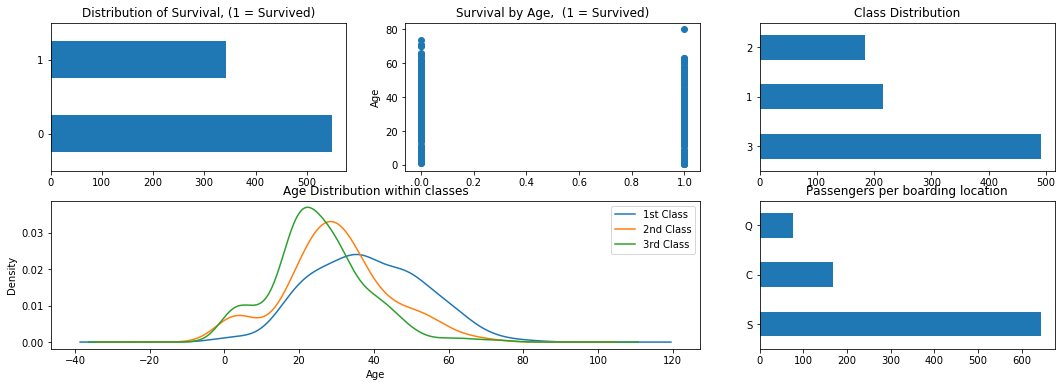

In [5]:
fig = plt.figure(figsize=(18, 6))

# plot.subplot2grid: create an axis at specific location inside a regular grid.
ax1 = plt.subplot2grid((2, 3), (0, 0))
train['Survived'].value_counts().plot(kind='barh')
plt.title("Distribution of Survival, (1 = Survived)")

ax2 = plt.subplot2grid((2, 3), (0, 1))
plt.scatter(train['Survived'], train['Age'])
plt.ylabel("Age")
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2, 3), (0, 2))
train['Pclass'].value_counts().plot(kind='barh')
plt.title("Class Distribution")

ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=2)
# kernel density estimate
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

ax5 = plt.subplot2grid((2, 3), (1, 2))
train['Embarked'].value_counts().plot(kind='barh')
plt.title("Passengers per boarding location")

In [6]:
train.drop(train[(train['Age'] > 75) & (train['Survived'] == 1.0)].index, inplace=True)

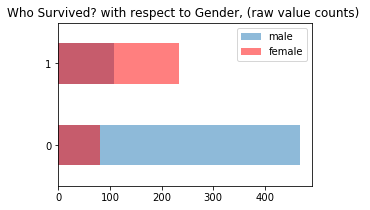

In [7]:
male = train['Survived'][train['Sex'] == 'male'].value_counts().sort_index()
female = train['Survived'][train['Sex'] == 'female'].value_counts().sort_index()

fig = plt.figure(figsize=(10, 3))

ax1 = fig.add_subplot(121)
male.plot(kind='barh', label='male', alpha=0.5)
female.plot(kind='barh', label='female', color='red', alpha=0.5)
plt.title("Who Survived? with respect to Gender, (raw value counts) ")
plt.legend(loc='best')

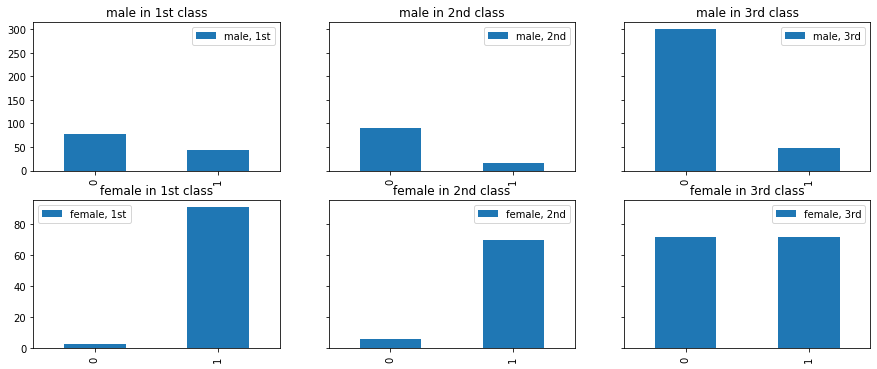

In [8]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(231)
male_1st = train['Survived'][train['Sex'] == 'male'][train['Pclass'] == 1].value_counts().sort_index()
male_1st.plot(kind='bar', label='male, 1st')
plt.title("male in 1st class")
plt.legend(loc='best')

ax2 = fig.add_subplot(232, sharey=ax1)
male_2nd = train['Survived'][train['Sex'] == 'male'][train['Pclass'] == 2].value_counts().sort_index()
male_2nd.plot(kind='bar', label='male, 2nd')
plt.title("male in 2nd class")
plt.legend(loc='best')

ax3 = fig.add_subplot(233, sharey=ax1)
male_3rd = train['Survived'][train['Sex'] == 'male'][train['Pclass'] == 3].value_counts().sort_index()
male_3rd.plot(kind='bar', label='male, 3rd')
plt.title("male in 3rd class")
plt.legend(loc='best')

ax4 = fig.add_subplot(234)
female_1st = train['Survived'][train['Sex'] == 'female'][train['Pclass'] == 1].value_counts().sort_index()
female_1st.plot(kind='bar', label='female, 1st')
plt.title("female in 1st class")
plt.legend(loc='best')

ax5 = fig.add_subplot(235, sharey=ax4)
female_2nd = train['Survived'][train['Sex'] == 'female'][train['Pclass'] == 2].value_counts().sort_index()
female_2nd.plot(kind='bar', label='female, 2nd')
plt.title("female in 2nd class")
plt.legend(loc='best')

ax6 = fig.add_subplot(236, sharey=ax4)
female_3rd = train['Survived'][train['Sex'] == 'female'][train['Pclass'] == 3].value_counts().sort_index()
female_3rd.plot(kind='bar', label='female, 3rd')
plt.title("female in 3rd class")
plt.legend(loc='best')

Text(0.5, 1.0, 'Age by Fare')

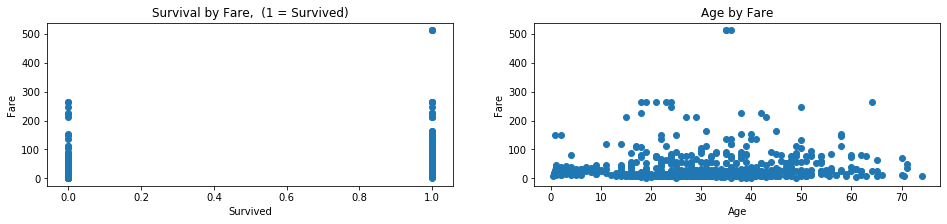

In [9]:
fig = plt.figure(figsize=(16, 3))

ax1 = fig.add_subplot(121)
plt.scatter(train['Survived'], train['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title("Survival by Fare,  (1 = Survived)")

ax2 = fig.add_subplot(122)
plt.scatter(train['Age'], train['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age by Fare')

In [10]:
train.drop(train[train['Fare'] > 500].index, inplace=True)

In [11]:
data = pd.concat((train.loc[:, 'Pclass':'Embarked'], test.loc[:, 'Pclass':'Embarked']), ignore_index=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1305 non-null   int64  
 1   Name      1305 non-null   object 
 2   Sex       1305 non-null   object 
 3   Age       1042 non-null   float64
 4   SibSp     1305 non-null   int64  
 5   Parch     1305 non-null   int64  
 6   Ticket    1305 non-null   object 
 7   Fare      1304 non-null   float64
 8   Cabin     292 non-null    object 
 9   Embarked  1303 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 102.1+ KB


In [13]:
data = data.drop(['Cabin', 'Ticket'], axis=1)
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data['Title'] = data['Name'].apply(
    lambda name: name.split(',')[1].split('.')[0].strip())
data = data.drop(['Name'], axis=1)
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...
1300,3,male,28.0,0,0,8.0500,S,Mr
1301,1,female,39.0,0,0,108.9000,C,Dona
1302,3,male,38.5,0,0,7.2500,S,Mr
1303,3,male,28.0,0,0,8.0500,S,Mr


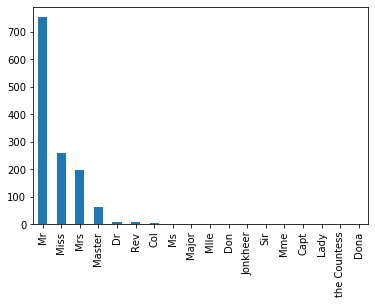

In [15]:
data['Title'].value_counts().plot(kind='bar')

In [16]:
def title_map(title):
    if title == 'Mr':
        x = 0
    elif title == 'Miss':
        x = 1
    elif title == 'Mrs':
        x = 2
    else:
        x = 3
    return x

data['Title'] = data['Title'].apply(title_map)

In [17]:
data['Family'] = data['SibSp'] + data['Parch']
data['Help'] = (data['Family'] == 0) * 1
data['Rich'] = 3 - data['Pclass']
data['Rank'] = data['Title']
data['Pclass'] = data['Pclass'].astype(str)
data['Title'] = data['Title'].astype(str)

In [18]:
data = pd.get_dummies(data)
data.shape

(1305, 20)

In [19]:
data

,Age,SibSp,Parch,Fare,Family,Help,Rich,Rank,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_0,Title_1,Title_2,Title_3
0,22.0,1,0,7.2500,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
1,38.0,1,0,71.2833,1,0,2,2,1,0,0,1,0,1,0,0,0,0,1,0
2,26.0,0,0,7.9250,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,35.0,1,0,53.1000,1,0,2,2,1,0,0,1,0,0,0,1,0,0,1,0
4,35.0,0,0,8.0500,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,28.0,0,0,8.0500,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0
1301,39.0,0,0,108.9000,0,1,2,3,1,0,0,1,0,1,0,0,0,0,0,1
1302,38.5,0,0,7.2500,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0
1303,28.0,0,0,8.0500,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

In [21]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [22]:
n_train = train.shape[0]

X = data_scaled[:n_train]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

passengerId = test['PassengerId']
test = data_scaled[n_train:]

In [23]:
clfs = [
    ('rbf svm', SVC(kernel='rbf')),
    ('linear svm', SVC(kernel='linear')),
    ('poly svm', SVC(kernel='poly')),
    ('lr', LogisticRegression()),
    ('rfc', RandomForestClassifier()),
    ('mlp', MLPClassifier()),
    ('adaboost', AdaBoostClassifier()),
    ('gbc', GradientBoostingClassifier())
]

for clf in clfs:
    print(clf[1])
    print(clf[1].fit(X_train, y_train).score(X_test, y_test))

SVC()
0.8355855855855856
SVC(kernel='linear')
0.8220720720720721
SVC(kernel='poly')
0.8400900900900901
LogisticRegression()
0.8265765765765766
RandomForestClassifier()
0.8040540540540541
MLPClassifier()
0.8400900900900901
AdaBoostClassifier()
0.8175675675675675
GradientBoostingClassifier()
0.8198198198198198


In [24]:
clf = StackingClassifier(estimators=clfs, final_estimator=LogisticRegression())
print(clf.fit(X_train, y_train).score(X_test, y_test))

0.8423423423423423


In [25]:
predict = clf.fit(X, y).predict(test)

In [26]:
submission = pd.DataFrame()
submission['passengerId'] = passengerId
submission['Survived'] = predict
submission['Survived'] = submission['Survived'].astype('int')
submission.to_csv('submission.csv', index=False)